# Data transforms

In [ ]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

import math
from numpy import mean 
from numpy import std
from numpy import percentile 
# from scipy.stats import iqr

## Plotting
import matplotlib.pyplot as plt

from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from matplotlib import pyplot

## How to Scale Numerical Data

📌 **Why Scale Numerical Data?**
- Many ML algorithms perform better with scaled data.
- Algorithms affected:<br>
o	**Weighted-sum models**: Linear Regression, Logistic Regression, Neural Networks.<br>
o	**Distance-based models**: KNN, SVM.<br>
- Algorithms unaffected: Decision Trees, Random Forests.
- Scaling helps:<br>
o	Prevent instability from large weights.<br>
o	Improve convergence and performance.<br>
o	Normalize gradients in neural networks.<br>

🔢 **Two Main Scaling Techniques**<br><br>
🔹 **Normalization (Min-Max Scaling)**<br>
- **Range**: Scales values to **[0, 1]**.
- Formula: **y = (x - min) / (max - min)**<br>
- Assumes known or estimable min and max.
- Sensitive to **outliers**.
- Use **MinMaxScaler** from scikit-learn.<br><br>
  
🔹 **Standardization (Z-score Scaling)**<br>
- **Range**: Mean = 0, Standard Deviation = 1.
- Formula: **y = (x - mean) / standard_deviation**<br>
- More **robust** to outliers.
- Assumes **Gaussian distribution** (but works without it).
- Use **StandardScaler** from scikit-learn.

🛠️ **How to Apply Scaling (Best Practice)**<br>
1. **Fit** the scaler on **training data** only.
2.	**Transform** the training and future data.
3.	Optionally **inverse transform** for interpretation.

❓ **Common Questions**<br>
- **Normalize vs Standardize?**<br>
o	Normalize if distribution is unknown or not Gaussian.<br>
o	Standardize if distribution is Gaussian or spread is wide.<br><br>
- **Standardize then Normalize?**<br>
o	Optional. Useful if mixing scaled data types or using distance-based models.<br><br>
- **Which is best?**<br>
o	No universal answer. Test both and compare performance.<br><br>
- **Out-of-bounds values?**<br>
o	Clamp to training min/max or set bounds manually.

✅ **Key Takeaways**
- **Scaling improves model performance and stability.**
- **Choose scaling based on data characteristics and model type.**
- Always **evaluate impact of scaling on performance.**

### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

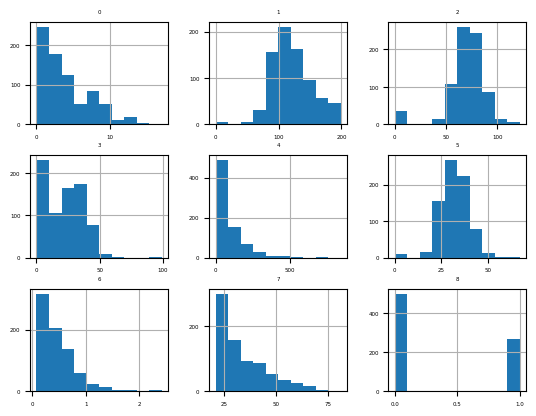

In [3]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. The complete example is listed below.

In [4]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


### MinMaxScaler Transform

🔹 **Normalization (Min-Max Scaling)**<br>
- **Range**: Scales values to **[0, 1]**.
- Formula: **y = (x - min) / (max - min)**<br>
- Assumes known or estimable min and max.
- Sensitive to **outliers**.
- Use **MinMaxScaler** from scikit-learn.<br><br>

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

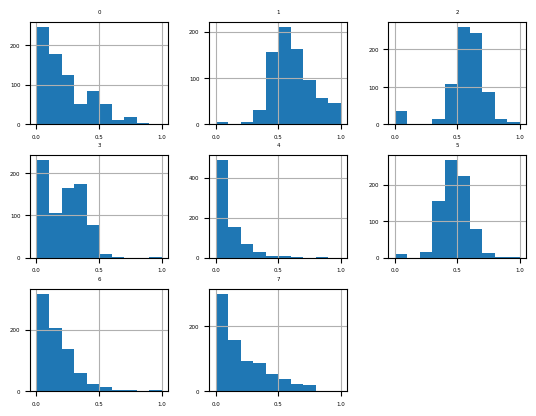

In [5]:
# visualize a minmax scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a MinMaxScaler transform of the dataset. The complete example is listed below.

In [6]:
# evaluate knn on the diabetes dataset with minmax scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = MinMaxScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


### StandardScaler Transform

🔹 **Standardization (Z-score Scaling)**<br>
- **Range**: Mean = 0, Standard Deviation = 1.
- Formula: **y = (x - mean) / standard_deviation**<br>
- More **robust** to outliers.
- Assumes **Gaussian distribution** (but works without it).
- Use **StandardScaler** from scikit-learn.

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

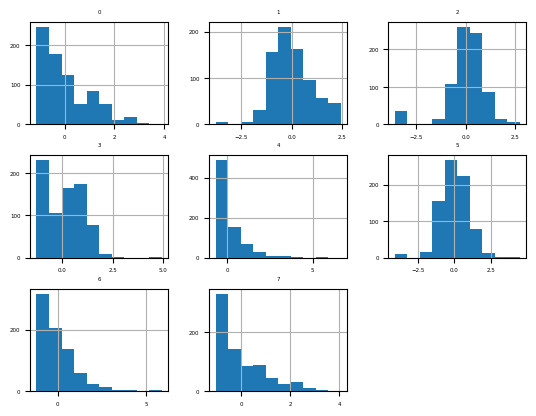

In [7]:
# visualize a standard scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)
# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a StandardScaler transform of the dataset. The complete example is listed below.

In [8]:
# evaluate knn on the diabetes dataset with standard scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = StandardScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


## How to Scale Data With Outliers

📌 **Why Scale Data?**
- Many ML algorithms perform better with scaled numerical input.
- Algorithms like linear regression, KNN, SVM, and neural networks are sensitive to feature scale.
- Large-valued features can dominate and bias model learning.

⚠️ **Problem with Standard Scaling**
- **Standardization** = subtract mean + divide by standard deviation.
- Works best with normally (Gaussian) distributed features.
- Fails with **outliers** – they skew mean and standard deviation.

✅ **Solution: Robust Scaling**
- Use **median** and **IQR (Interquartile Range)** instead of mean and std.
- Called **Robust Scaling** – less sensitive to outliers.
- Transforms:<br>
o	Subtract the median (centering)<br>
o	Divide by IQR (scaling)<br>
- Result: distribution centered at 0, with unit-scale, preserving outliers.

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

🧠 **Key Takeaways for Data Scientists**
- Always consider feature scaling before training models.
- Prefer **RobustScaler** when data has **outliers**.
- Tune quantile_range for better performance – no one-size-fits-all.
- Evaluate scaling impacts using cross-validation.

#### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

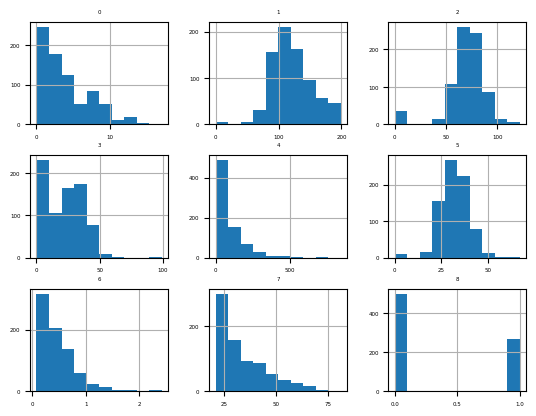

In [9]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [10]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


#### IQR Robust Scaler Transform

✅ **Solution: Robust Scaling**
- Use **median** and **IQR (Interquartile Range)** instead of mean and std.
- Called **Robust Scaling** – less sensitive to outliers.
- Transforms:<br>
o	Subtract the median (centering)<br>
o	Divide by IQR (scaling)<br>
- Result: distribution centered at 0, with unit-scale, preserving outliers.

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

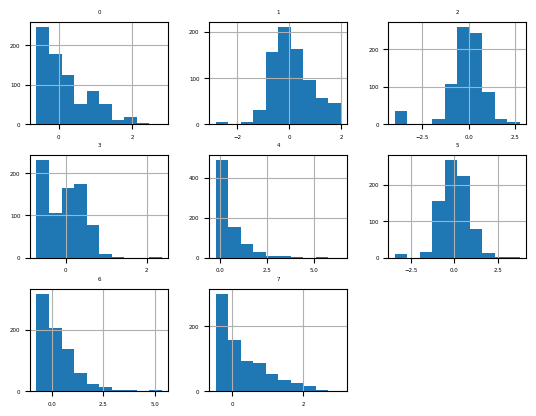

In [11]:
# visualize a robust scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler 
from matplotlib import pyplot

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data) 

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case on a robust scaler transform of the dataset. <br>The complete example is listed below.

In [12]:
# evaluate knn on the diabetes dataset with robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler 
from sklearn.pipeline import Pipeline

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = RobustScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


Next, let’s explore the effect of different scaling ranges.

#### Explore Robust Scaler Range

🛠️ **Using RobustScaler in Python (scikit-learn)**
- RobustScaler() available in sklearn.preprocessing.
- Parameters:<br>
o	**with_centering**=True: subtract median<br>
o	**with_scaling**=True: divide by IQR<br>
o	**quantile_range**=(25, 75): default IQR range, can be customized

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


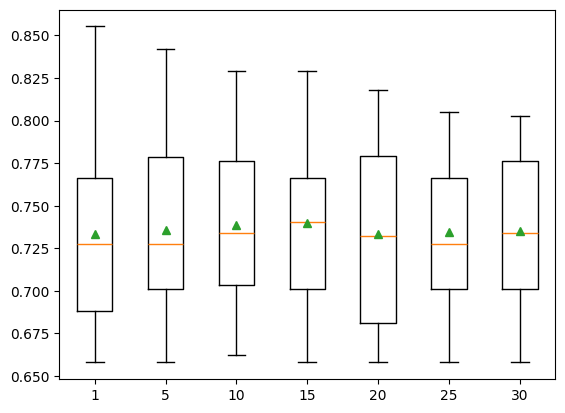

In [13]:
# explore the scaling range of the robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    # load dataset
    path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
    dataset = read_csv(path_diabetes, header=None)     
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value)) 
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores


# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()